201402096 산업경영공학과 유하준

# wordcloud 이용하여 단어빈도 분석하기

텍스트 데이터의 전처리 및 탐색적 분석<br>
Due data: 11월 15일(월)<br>
보고서, 프로그램 파일 첨부, 온라인으로 제출 가능<br>
nltk.corpus의 gutenbeg에서 다음과 같은 분석을 실시한다.

__보고서 포함될 내용__<br>
1. 탐색적 분석을 실시한다. 이를 위하여 핵심 기술통계량을 산출하고, 다양한 그래프 및 wordcloud 등을 이용하여 시각적으로 설명한다.<br>
2. 3개 작품이 존재하는 austen, cheserton, sakespeare의 작품에서 각각 저자 내의 작품 간 어떠한 차이점과 공통점이 존재하는가?<br>
3. 서로 다른 3명의 작가에 대한 분석을 통해 text analytics를 통해서 이들을 비교하는 어떠한 분석이 가능한가?<br>
4. Text analytics를 통하여 본인이 추가적으로 분석하고자 하는 작업을 진행한다.<br>
<br>

__Wordcloud__<br>

단어빈도 분석은 단어구름(wordcloud) 형태로도 많이 표현한다.<br>
Wordcloud로 나타내면 시각적으로 핵심단어들을 한눈에 알 수 있다.<br> 단어의 출현빈도가 높은 단어는 큰 장어로 표현되고 상대적으로 출현빈도가 낮은 단어는 작은 장어로 표현된다.<br>
또한 전체적인 모양과 단어의 색상도 사용자가 직접 지정할 수 있어 시각적으로 화려한 효과를 주기도 한다.<br>
특히 문서별로 비교, 대비하면 확연히 문서의 성격 차이를 한눈에 확인할 수 있다.


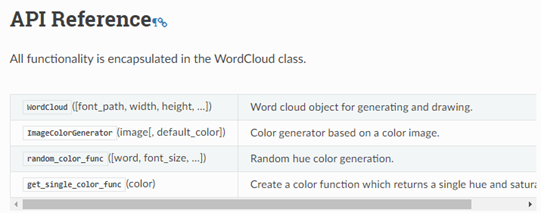

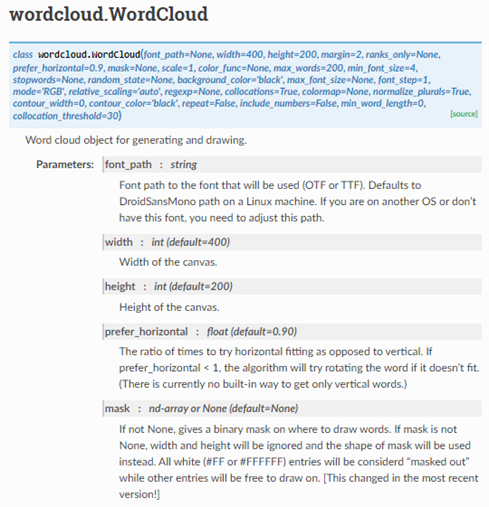

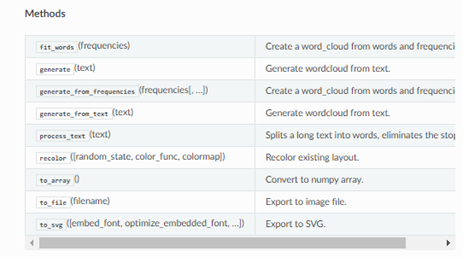

In [219]:
import nltk
import pandas as pd

In [220]:
from nltk.corpus import gutenberg
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [221]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [222]:
emma = gutenberg.raw('austen-emma.txt')

In [223]:
shakespeare = gutenberg.raw('shakespeare-hamlet.txt')

In [224]:
chesterton = gutenberg.raw('chesterton-brown.txt')

In [225]:
type(emma)

str

In [226]:
len(emma)

887071

In [227]:
len(gutenberg.sents("austen-emma.txt"))

7752

In [228]:
emma[:500]

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died t"

## 통계적 처리

평균 단어 길이, 평균 문장 길이, 그리고 각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수( 어휘 다양성 점수)

In [229]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print(f'평균단어길이:{int(num_chars/num_words)}, 평균 문장 길이 : {int(num_words/num_sents)}, \n각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : {int(num_words/num_vocab)}, {fileid}\n')

평균단어길이:4, 평균 문장 길이 : 24, 
각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : 26, austen-emma.txt

평균단어길이:4, 평균 문장 길이 : 26, 
각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : 16, austen-persuasion.txt

평균단어길이:4, 평균 문장 길이 : 28, 
각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : 22, austen-sense.txt

평균단어길이:4, 평균 문장 길이 : 33, 
각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : 79, bible-kjv.txt

평균단어길이:4, 평균 문장 길이 : 19, 
각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : 5, blake-poems.txt

평균단어길이:4, 평균 문장 길이 : 19, 
각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : 14, bryant-stories.txt

평균단어길이:4, 평균 문장 길이 : 17, 
각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : 12, burgess-busterbrown.txt

평균단어길이:4, 평균 문장 길이 : 20, 
각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : 12, carroll-alice.txt

평균단어길이:4, 평균 문장 길이 : 20, 
각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : 11, chesterton-ball.txt

평균단어길이:4, 평균 문장 길이 : 22, 
각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : 11, chesterton-brown.txt

평균단어길이:4, 평균 문장 길이 : 18, 
각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : 10, chesterton-thursday.txt

평균단어길이:4, 평균 문장 길이 : 20, 
각 어휘 항목이 텍스트에 평균적으로 나타나는 횟수 : 24, edgeworth-parents.txt

평균단어길이:4, 평균 문장 길이 : 25, 
각 어휘 항목이 텍

In [230]:
from collections import Counter

In [231]:
Counter(gutenberg.words("austen-emma.txt")).most_common(50)

[(',', 11454),
 ('.', 6928),
 ('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 (';', 2199),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('"', 2004),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('--', 1382),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301),
 ('is', 1220),
 ('with', 1187),
 ('Mr', 1153),
 ('very', 1151),
 ('but', 1148),
 ('."', 1138),
 ('his', 1088),
 ("'", 1007),
 ('at', 997),
 ('s', 933),
 ('so', 924),
 ('Emma', 865),
 ('all', 835),
 ('could', 825),
 ('would', 815),
 ('been', 759),
 ('him', 758),
 ('Mrs', 699),
 ('.--', 685),
 ('on', 677),
 ('any', 651),
 ('my', 619),
 ('no', 616),
 ('Miss', 592),
 ('were', 591)]

In [239]:
Counter(gutenberg.words('chesterton-brown.txt')).most_common(50)

[('the', 4321),
 (',', 4069),
 ('.', 2784),
 ('of', 2087),
 ('and', 2074),
 ('a', 2074),
 ('"', 1461),
 ('to', 1378),
 ('in', 1205),
 ('was', 1141),
 ('I', 1093),
 ('he', 1047),
 ("'", 924),
 ('his', 907),
 ('that', 880),
 ('it', 796),
 (';', 764),
 ('with', 726),
 ('you', 586),
 ('as', 585),
 ('-', 573),
 ('had', 521),
 (',"', 520),
 ('but', 487),
 ('on', 456),
 ('is', 450),
 ('."', 444),
 ('s', 438),
 ('at', 416),
 ('said', 415),
 ('for', 387),
 ('him', 376),
 ('The', 346),
 ('like', 328),
 ('not', 313),
 ('He', 310),
 ('be', 305),
 ('man', 303),
 ('t', 296),
 ('or', 287),
 ('have', 283),
 ('one', 264),
 ('Brown', 261),
 ('by', 259),
 ('this', 254),
 ('all', 253),
 ('?"', 248),
 ('which', 240),
 ('were', 240),
 ('an', 236)]

In [233]:
Counter(gutenberg.words("shakespeare-hamlet.txt")).most_common(50)

[(',', 2892),
 ('.', 1886),
 ('the', 860),
 ("'", 729),
 ('and', 606),
 ('of', 576),
 ('to', 576),
 (':', 565),
 ('I', 553),
 ('you', 479),
 ('?', 459),
 ('a', 449),
 ('my', 435),
 ('in', 359),
 ('it', 354),
 ('Ham', 337),
 ('is', 304),
 (';', 298),
 ('not', 286),
 ('his', 266),
 ('And', 257),
 ('that', 257),
 ('your', 233),
 ('this', 232),
 ('me', 227),
 ('d', 223),
 ('with', 212),
 ('Lord', 211),
 ('him', 178),
 ('be', 176),
 ('King', 172),
 ('for', 169),
 ('haue', 161),
 ('he', 160),
 ('but', 146),
 ('so', 145),
 ('as', 142),
 ('The', 133),
 ('will', 131),
 ('on', 123),
 ('s', 122),
 ('That', 120),
 ('our', 118),
 ('-', 117),
 ('what', 116),
 ('are', 113),
 ('To', 109),
 ('shall', 104),
 ('But', 103),
 ('Hamlet', 99)]

In [234]:
from nltk.tokenize import RegexpTokenizer
pattern = "[\w]+"
retokenize = RegexpTokenizer(pattern)
retokenize.tokenize(emma[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [235]:
from nltk import Text
text = Text(retokenize.tokenize(emma))

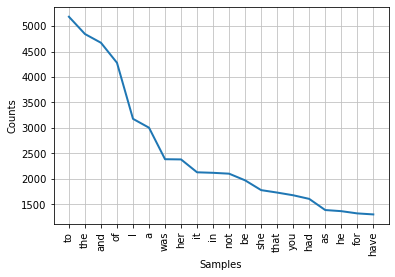

In [236]:
text.plot(20)
plt.show()

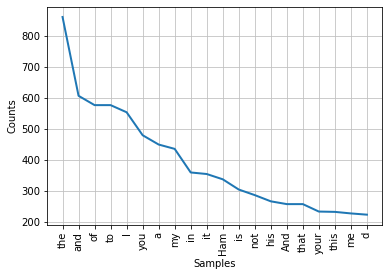

In [237]:
shakespeare_text = Text(retokenize.tokenize(shakespeare))
shakespeare_text.plot(20)
plt.show()


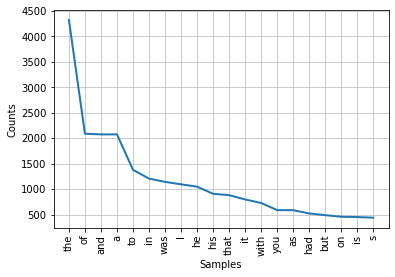

In [238]:
chesterton_text = Text(retokenize.tokenize(chesterton))
chesterton_text.plot(20)
plt.show()


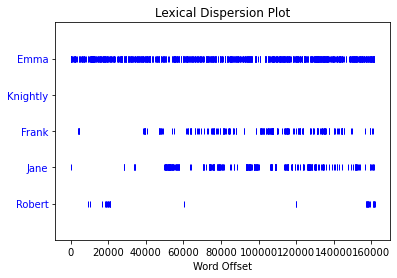

In [14]:
raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
text = Text(retokenize.tokenize(raw))

text.dispersion_plot(['Emma', 'Knightly', 'Frank', 'Jane', 'Robert'])
# 소설 속 등장인물 
plt.show()

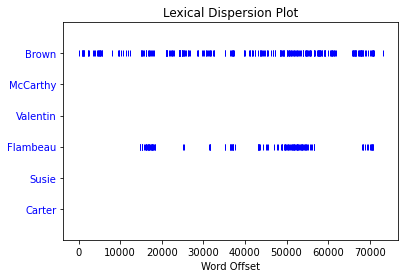

In [298]:
raw = nltk.corpus.gutenberg.raw("chesterton-brown.txt")
text = Text(retokenize.tokenize(raw))

text.dispersion_plot(['Brown','McCarthy', 'Valentin', 'Flambeau', 'Susie', 'Carter'])
# 소설 속 등장인물 
plt.show()

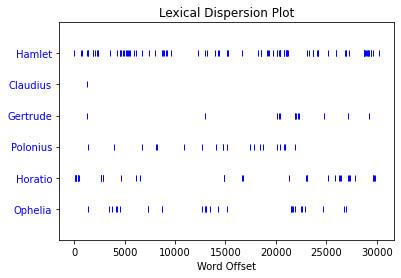

In [161]:
raw = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
text = Text(retokenize.tokenize(raw))

text.dispersion_plot(['Hamlet', 'Claudius', 'Gertrude', 'Polonius', 'Horatio','Ophelia'])
# 소설 속 등장인물 
plt.show()

### 문장 단위 분석

#### 문장 단위 분석 (Emma)

In [174]:
emma_list = gutenberg.open('austen-emma.txt')
emma_list = emma_list.readlines()
emma_list = list(filter(None, [item.strip('\n') for item in emma_list]))

In [175]:
emma_list[:100]

['[Emma by Jane Austen 1816]',
 'VOLUME I',
 'CHAPTER I',
 'Emma Woodhouse, handsome, clever, and rich, with a comfortable home',
 'and happy disposition, seemed to unite some of the best blessings',
 'of existence; and had lived nearly twenty-one years in the world',
 'with very little to distress or vex her.',
 'She was the youngest of the two daughters of a most affectionate,',
 "indulgent father; and had, in consequence of her sister's marriage,",
 'been mistress of his house from a very early period.  Her mother',
 'had died too long ago for her to have more than an indistinct',
 'remembrance of her caresses; and her place had been supplied',
 'by an excellent woman as governess, who had fallen little short',
 'of a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,",
 'less as a governess than a friend, very fond of both daughters,',
 'but particularly of Emma.  Between _them_ it was more the intimacy',
 'of sisters.  Even before Miss Taylor ha

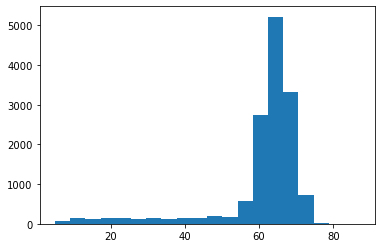

In [176]:
sentence_lengths = [len(sentence) for sentence in emma_list]
sentence_lengths[:100]  
plt.hist(sentence_lengths, bins=20)
plt.show()

In [179]:
raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
text = Text(retokenize.tokenize(raw))

wordslist = text[:2000]
wordslist

['Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 'indulgent',
 'father',
 'and',
 'had',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 's',
 'marriage',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 'and',
 'her',
 'place',
 'had'

Text(0, 0.5, 'Words Frequency')

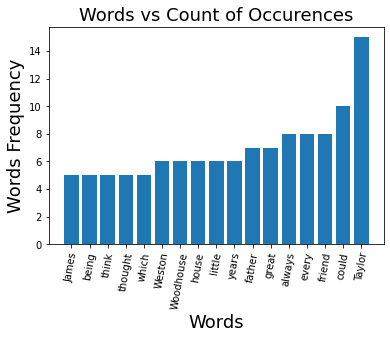

In [180]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
#
# Frequency distribution
#
fdist = FreqDist(wordslist)
#
# Print words having 5 or more characters which occured for 5 or more times
#
frequent_words = [[fdist[word], word] for word in set(wordslist) if len(word) > 4 and fdist[word] >= 5]
#
# Record the frequency count of
#
sorted_word_frequencies = {}
for item in sorted(frequent_words):
    sorted_word_frequencies[item[1]] = item[0]
#
# Create the plot
#
plt.bar(range(len(sorted_word_frequencies)), list(sorted_word_frequencies.values()), align='center')
plt.xticks(range(len(sorted_word_frequencies)), list(sorted_word_frequencies.keys()), rotation=80)
plt.title("Words vs Count of Occurences", fontsize=18)
plt.xlabel("Words", fontsize=18)
plt.ylabel("Words Frequency", fontsize=18)

In [181]:
tokens = [sentence.split() for sentence in emma_list] 

In [182]:
print(tokens[:5])

[['[Emma', 'by', 'Jane', 'Austen', '1816]'], ['VOLUME', 'I'], ['CHAPTER', 'I'], ['Emma', 'Woodhouse,', 'handsome,', 'clever,', 'and', 'rich,', 'with', 'a', 'comfortable', 'home'], ['and', 'happy', 'disposition,', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings']]


In [183]:
num_tokens_per_sentence = [len(sentence.split()) for sentence in emma_list]      
# 문장당 단어의 개수를 의미한다.
print(num_tokens_per_sentence[:30])

[5, 2, 2, 10, 11, 11, 8, 12, 10, 12, 13, 10, 11, 5, 10, 12, 11, 12, 11, 11, 12, 11, 9, 2, 12, 13, 10, 11, 12, 2]


In [184]:
print(min(num_tokens_per_sentence))
print(max(num_tokens_per_sentence))

1
17


In [185]:
num_tokens_per_sentence_df = pd.DataFrame(num_tokens_per_sentence, columns =['number'])

In [186]:
num_tokens_per_sentence_df

,number
0,5
1,2
2,2
3,10
4,11
...,...
14278,10
14279,10
14280,10
14281,7


In [187]:
num_tokens_per_sentence_df.describe()

,number
count,14283.000000
mean,11.073794
std,2.626604
min,1.000000
25%,10.000000
50%,12.000000
75%,13.000000
max,17.000000


(array([  14.,  255.,  176.,  185.,  181.,  186.,  218.,  409.,  817.,
        1751., 2839., 3178., 2363., 1173.,  433.,   93.,   12.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 <BarContainer object of 17 artists>)

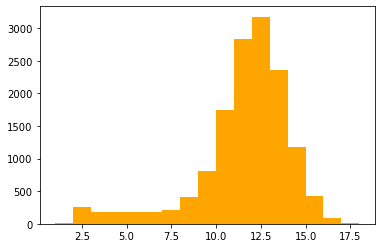

In [188]:
plt.hist(num_tokens_per_sentence_df, bins = range(1,19), color = 'orange')

#### Cherston

In [250]:
chesterton_list = gutenberg.open('chesterton-brown.txt')
chesterton_list = chesterton_list.readlines()
chesterton_list = list(filter(None, [item.strip('\n') for item in chesterton_list]))

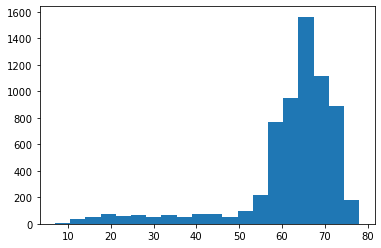

In [251]:
sentence_lengths = [len(sentence) for sentence in chesterton_list]
sentence_lengths[:100]  
plt.hist(sentence_lengths, bins=20)
plt.show()

In [252]:
raw = nltk.corpus.gutenberg.raw("chesterton-brown.txt")
text = Text(retokenize.tokenize(raw))

In [253]:
wordslist = text[:2000]

Text(0, 0.5, 'Words Frequency')

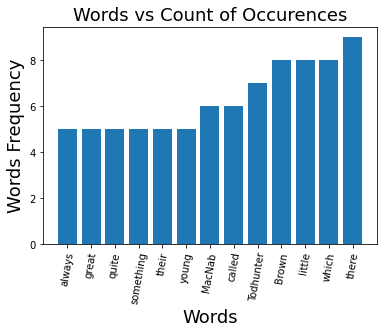

In [254]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
#
# Frequency distribution
#
fdist = FreqDist(wordslist)
#
# Print words having 5 or more characters which occured for 5 or more times
#
frequent_words = [[fdist[word], word] for word in set(wordslist) if len(word) > 4 and fdist[word] >= 5]
#
# Record the frequency count of
#
sorted_word_frequencies = {}
for item in sorted(frequent_words):
    sorted_word_frequencies[item[1]] = item[0]
#
# Create the plot
#
plt.bar(range(len(sorted_word_frequencies)), list(sorted_word_frequencies.values()), align='center')
plt.xticks(range(len(sorted_word_frequencies)), list(sorted_word_frequencies.keys()), rotation=80)
plt.title("Words vs Count of Occurences", fontsize=18)
plt.xlabel("Words", fontsize=18)
plt.ylabel("Words Frequency", fontsize=18)

In [255]:
tokens = [sentence.split() for sentence in chesterton_list] 

In [256]:
num_tokens_per_sentence = [len(sentence.split()) for sentence in chesterton_list]      
# 문장당 단어의 개수를 의미한다.
print(num_tokens_per_sentence[:30])

[10, 6, 9, 10, 12, 13, 15, 11, 13, 9, 11, 11, 14, 13, 11, 10, 12, 14, 12, 13, 11, 12, 14, 13, 12, 13, 10, 13, 11, 9]


In [257]:
print(min(num_tokens_per_sentence))
print(max(num_tokens_per_sentence))

1
18


In [258]:
num_tokens_per_sentence_df = pd.DataFrame(num_tokens_per_sentence, columns =['number'])

In [259]:
num_tokens_per_sentence_df

,number
0,10
1,6
2,9
3,10
4,12
...,...
6438,15
6439,3
6440,11
6441,12


In [260]:
num_tokens_per_sentence_df.describe()

,number
count,6443.000000
mean,11.116871
std,2.606829
min,1.000000
25%,10.000000
50%,11.000000
75%,13.000000
max,18.000000


(array([   4.,   35.,   93.,  105.,   95.,  103.,  131.,  211.,  427.,
         843., 1185., 1256., 1034.,  584.,  250.,   74.,   13.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 <BarContainer object of 17 artists>)

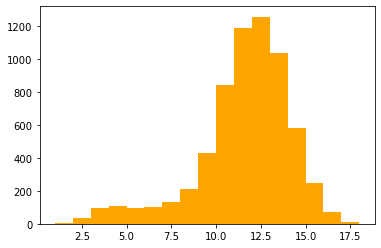

In [261]:
plt.hist(num_tokens_per_sentence_df, bins = range(1,19), color = 'orange')

#### Hamlet

In [202]:
hamlet_list = gutenberg.open('shakespeare-hamlet.txt')
hamlet_list = hamlet_list.readlines()
hamlet_list = list(filter(None, [item.strip('\n') for item in hamlet_list]))

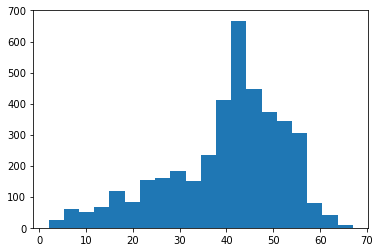

In [203]:
sentence_lengths = [len(sentence) for sentence in hamlet_list]
sentence_lengths[:100]  
plt.hist(sentence_lengths, bins=20)
plt.show()

In [206]:
raw = nltk.corpus.gutenberg.raw("shakespeare-hamlet.txt")
text = Text(retokenize.tokenize(raw))

In [207]:
wordslist = text[:2000]

Text(0, 0.5, 'Words Frequency')

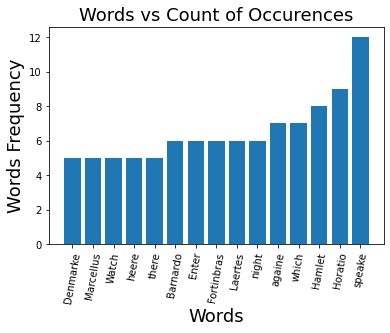

In [208]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
#
# Frequency distribution
#
fdist = FreqDist(wordslist)
#
# Print words having 5 or more characters which occured for 5 or more times
#
frequent_words = [[fdist[word], word] for word in set(wordslist) if len(word) > 4 and fdist[word] >= 5]
#
# Record the frequency count of
#
sorted_word_frequencies = {}
for item in sorted(frequent_words):
    sorted_word_frequencies[item[1]] = item[0]
#
# Create the plot
#
plt.bar(range(len(sorted_word_frequencies)), list(sorted_word_frequencies.values()), align='center')
plt.xticks(range(len(sorted_word_frequencies)), list(sorted_word_frequencies.keys()), rotation=80)
plt.title("Words vs Count of Occurences", fontsize=18)
plt.xlabel("Words", fontsize=18)
plt.ylabel("Words Frequency", fontsize=18)

In [209]:
tokens = [sentence.split() for sentence in hamlet_list] 

In [210]:
num_tokens_per_sentence = [len(sentence.split()) for sentence in hamlet_list]      
# 문장당 단어의 개수를 의미한다.
print(num_tokens_per_sentence[:30])

[8, 4, 6, 3, 7, 2, 5, 2, 2, 8, 10, 9, 6, 6, 5, 9, 10, 4, 9, 5, 6, 5, 9, 8, 2, 3, 6, 5, 6, 9]


In [211]:
num_tokens_per_sentence_df = pd.DataFrame(num_tokens_per_sentence, columns =['number'])

In [214]:
num_tokens_per_sentence_df.describe()

,number
count,3966.000000
mean,7.464700
std,2.527756
min,1.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,14.000000


(array([ 85., 122., 125., 205., 313., 334., 534., 747., 715., 458., 197.,
         92.,  34.,   5.,   0.,   0.,   0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 <BarContainer object of 17 artists>)

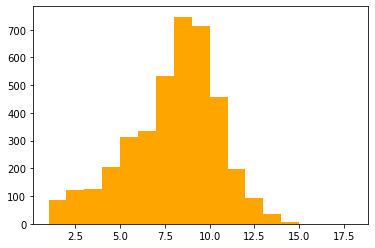

In [215]:
plt.hist(num_tokens_per_sentence_df, bins = range(1,19), color = 'orange')

In [68]:
words = [word for sentence in tokens for word in sentence] 

In [69]:
print(words[:50])

['[Emma', 'by', 'Jane', 'Austen', '1816]', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse,', 'handsome,', 'clever,', 'and', 'rich,', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition,', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence;', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her.', 'She']


In [70]:
len(words)

158167

In [72]:
import re

In [73]:
words = [re.sub(r'[^A-Za-z]', '', word) for word in words]   
  # alphabetic이 아닌 모든 기호를 제거함

In [74]:
print(words[:50])

['Emma', 'by', 'Jane', 'Austen', '', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twentyone', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'She']


In [75]:
len(words)

158167

In [76]:
words = list(filter(None, words))

In [77]:
len(words)

158128

In [78]:
print(words[:50])

['Emma', 'by', 'Jane', 'Austen', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twentyone', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'She', 'was']


In [79]:
from collections import Counter # frequency distribution 보다 편함 

In [80]:
words = [word.lower() for word in words]    

In [81]:
fdist = Counter(words)

In [82]:
fdist.most_common(10)

[('to', 5149),
 ('the', 5146),
 ('and', 4613),
 ('of', 4274),
 ('a', 3073),
 ('i', 2968),
 ('her', 2417),
 ('it', 2400),
 ('was', 2376),
 ('she', 2278)]

In [83]:
max([len(word) for word in words])

31

In [84]:
min(len(word) for word in words)

1

In [85]:
[word for word in words if len(word) >= 16]

['consciousnessmiss',
 'competenceenough',
 'companionableness',
 'talkativenessamused',
 'undoubtedlyremarkably',
 'arrangedsometimes',
 'foreshorteningoh',
 'harrietwellandand',
 'misunderstanding',
 'favourableinstead',
 'incomprehensible',
 'wantconsideration',
 'inconvenientpoor',
 'doubtinglyrather',
 'undistinguishing',
 'anticipatedwhich',
 'threeandtwentyis',
 'cheerfultempered',
 'unceremoniousness',
 'isabellaexclaimed',
 'absurdityactually',
 'thoughtespecially',
 'hopingfearingadoringready',
 'encouragementsir',
 'understandingreally',
 'disappointedmuch',
 'fourandtwentycannot',
 'understandcertainly',
 'awayparticularly',
 'delicatehartfield',
 'mortifieddisappointed',
 'concernsexpecting',
 'congratulatedready',
 'acknowledgedwhat',
 'approvesomething',
 'otherwiseimpossibleshe',
 'horsewomanpleasant',
 'neighbourhoodhighbury',
 'extremelythought',
 'altogetherthought',
 'attachmentwhether',
 'preferenceremained',
 'excessivelywhich',
 'insufferabledreadfuli',
 'weeksin

## 글자만을 추출함

In [262]:
from nltk.tokenize import RegexpTokenizer

In [263]:
tokenizer = RegexpTokenizer('[\w]+')
words_emma = tokenizer.tokenize(emma)
words_shakespeare = tokenizer.tokenize(shakespeare)
words_chesterton = tokenizer.tokenize(chesterton)

In [264]:
type(words_emma)

list

In [265]:
print(words_emma[:100])

['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'in', 'consequence', 'of', 'her', 'sister', 's', 'marriage', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of']


In [266]:
print(words_shakespeare[:100])

['The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', 'Actus', 'Primus', 'Scoena', 'Prima', 'Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels', 'Barnardo', 'Who', 's', 'there', 'Fran', 'Nay', 'answer', 'me', 'Stand', 'vnfold', 'your', 'selfe', 'Bar', 'Long', 'liue', 'the', 'King', 'Fran', 'Barnardo', 'Bar', 'He', 'Fran', 'You', 'come', 'most', 'carefully', 'vpon', 'your', 'houre', 'Bar', 'Tis', 'now', 'strook', 'twelue', 'get', 'thee', 'to', 'bed', 'Francisco', 'Fran', 'For', 'this', 'releefe', 'much', 'thankes', 'Tis', 'bitter', 'cold', 'And', 'I', 'am', 'sicke', 'at', 'heart', 'Barn', 'Haue', 'you', 'had', 'quiet', 'Guard', 'Fran', 'Not', 'a', 'Mouse', 'stirring', 'Barn', 'Well', 'goodnight', 'If', 'you', 'do', 'meet', 'Horatio', 'and', 'Marcellus', 'the', 'Riuals', 'of', 'my', 'Watch', 'bid', 'them']


In [267]:
print(words_chesterton[:100])

['The', 'Wisdom', 'of', 'Father', 'Brown', 'by', 'G', 'K', 'Chesterton', '1914', 'I', 'The', 'Absence', 'of', 'Mr', 'Glass', 'THE', 'consulting', 'rooms', 'of', 'Dr', 'Orion', 'Hood', 'the', 'eminent', 'criminologist', 'and', 'specialist', 'in', 'certain', 'moral', 'disorders', 'lay', 'along', 'the', 'sea', 'front', 'at', 'Scarborough', 'in', 'a', 'series', 'of', 'very', 'large', 'and', 'well', 'lighted', 'french', 'windows', 'which', 'showed', 'the', 'North', 'Sea', 'like', 'one', 'endless', 'outer', 'wall', 'of', 'blue', 'green', 'marble', 'In', 'such', 'a', 'place', 'the', 'sea', 'had', 'something', 'of', 'the', 'monotony', 'of', 'a', 'blue', 'green', 'dado', 'for', 'the', 'chambers', 'themselves', 'were', 'ruled', 'throughout', 'by', 'a', 'terrible', 'tidiness', 'not', 'unlike', 'the', 'terrible', 'tidiness', 'of', 'the', 'sea', 'It']


In [268]:
from collections import Counter

In [269]:
fdist_emma = Counter(words_emma)
fdist_shakespeare = Counter(words_shakespeare)
fdist_chesterton = Counter(words_chesterton)

In [270]:
fdist_emma.most_common(20)

[('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301)]

In [271]:
fdist_shakespeare.most_common(20)

[('the', 860),
 ('and', 606),
 ('of', 576),
 ('to', 576),
 ('I', 553),
 ('you', 479),
 ('a', 449),
 ('my', 435),
 ('in', 359),
 ('it', 354),
 ('Ham', 337),
 ('is', 304),
 ('not', 286),
 ('his', 266),
 ('And', 257),
 ('that', 257),
 ('your', 233),
 ('this', 232),
 ('me', 227),
 ('d', 223)]

In [272]:
fdist_chesterton.most_common(20)

[('the', 4321),
 ('of', 2087),
 ('and', 2074),
 ('a', 2074),
 ('to', 1378),
 ('in', 1205),
 ('was', 1141),
 ('I', 1093),
 ('he', 1047),
 ('his', 907),
 ('that', 880),
 ('it', 796),
 ('with', 726),
 ('you', 586),
 ('as', 585),
 ('had', 521),
 ('but', 487),
 ('on', 456),
 ('is', 450),
 ('s', 438)]

In [273]:
wc = WordCloud()

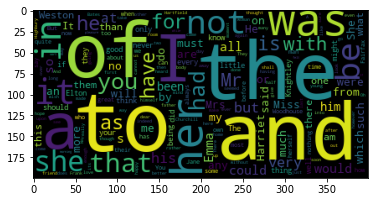

In [274]:
wc.generate_from_frequencies(fdist_emma)
plt.imshow(wc)

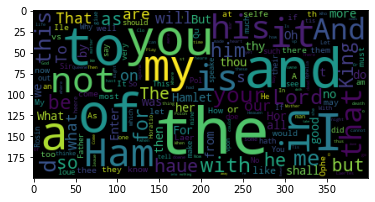

In [275]:
wc.generate_from_frequencies(fdist_shakespeare)
plt.imshow(wc)

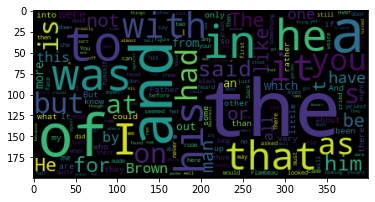

In [276]:
wc.generate_from_frequencies(fdist_chesterton)
plt.imshow(wc)

## generate() 메서드를 이용하여 전체 작품을 직접 wordcloud로 작성함

In [277]:
emma_full = ' '.join(words_emma)
shakespeare_full = ' '.join(words_shakespeare)
chesterton_full = ' '.join(words_chesterton)

In [278]:
emma_full

'Emma by Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twenty one years in the world with very little to distress or vex her She was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sister s marriage been mistress of his house from a very early period Her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection Sixteen years had Miss Taylor been in Mr Woodhouse s family less as a governess than a friend very fond of both daughters but particularly of Emma Between _them_ it was more the intimacy of sisters Even before Miss Taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed 

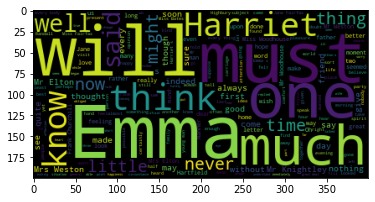

In [279]:
wc.generate(emma_full)
plt.imshow(wc)

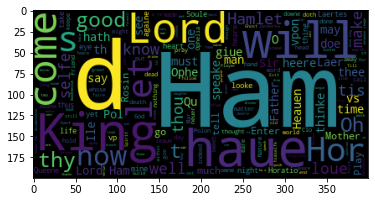

In [280]:
wc.generate(shakespeare_full)
plt.imshow(wc)

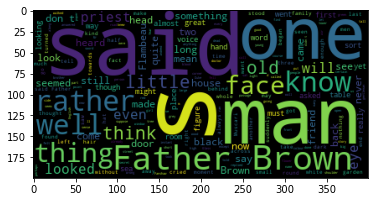

In [281]:
wc.generate(chesterton_full)
plt.imshow(wc)

## stopwords를 제거하여 분석을 진행함

In [282]:
from nltk.corpus import stopwords
import pandas as pd

In [283]:
stopwords = stopwords.words('english')

In [284]:
emma_words = nltk.tokenize.word_tokenize(emma_full)
shakespeare_words = nltk.tokenize.word_tokenize(shakespeare_full)
chesterton_words = nltk.tokenize.word_tokenize(chesterton_full)


In [285]:
emma_words = [word for word in emma_words if word not in stopwords]
shakespeare_words = [word for word in shakespeare_words if word not in stopwords]
chesterton_words = [word for word in chesterton_words if word not in stopwords]

In [286]:
emma_fdist = Counter(emma_words)
shakespeare_fdist = Counter(shakespeare_words)
chesterton_fdist = Counter(chesterton_words)



In [287]:
emma_common_df = emma_fdist.most_common(20)
shakespeare_common_df = shakespeare_fdist.most_common(20)
chesterton_common_df = chesterton_fdist.most_common(20)


In [288]:
# create DataFrame using data
emma_common_df = pd.DataFrame(emma_common_df, columns =['word', 'freq'])
shakespeare_common_df = pd.DataFrame(shakespeare_common_df, columns =['word', 'freq'])
chesterton_common_df = pd.DataFrame(chesterton_common_df, columns =['word', 'freq'])


display(emma_common_df)
display(shakespeare_common_df)
display(chesterton_common_df)

,word,freq
0,I,3178
1,Mr,1153
2,Emma,865
3,could,825
4,would,815
5,Mrs,699
6,Miss,592
7,must,564
8,She,562
9,Harriet,506


,word,freq
0,I,553
1,Ham,337
2,And,257
3,Lord,211
4,King,172
5,haue,161
6,The,133
7,That,120
8,To,109
9,shall,104


,word,freq
0,I,1093
1,said,415
2,The,346
3,like,328
4,He,310
5,man,303
6,one,264
7,Brown,261
8,Father,205
9,But,205


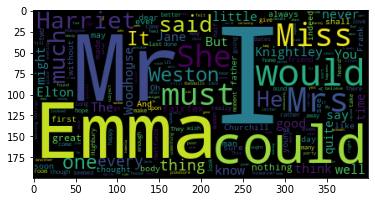

In [289]:
wc.generate_from_frequencies(emma_fdist)
plt.imshow(wc)

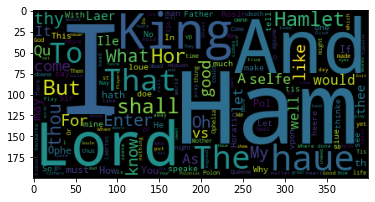

In [290]:
wc.generate_from_frequencies(shakespeare_fdist)
plt.imshow(wc)

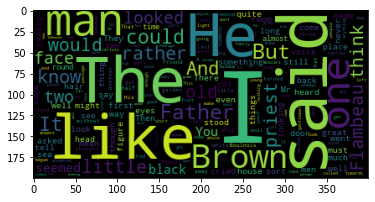

In [291]:
wc.generate_from_frequencies(chesterton_fdist)
plt.imshow(wc)

In [292]:
emma = ' '.join(emma_words)

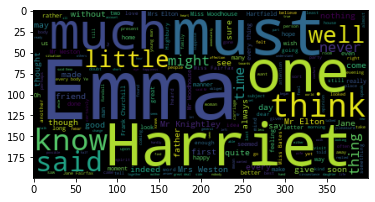

In [293]:
wc.generate(emma)
plt.imshow(wc)

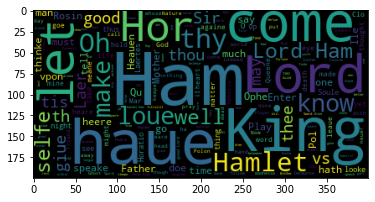

In [294]:
shakespeare = ' '.join(shakespeare_words)
wc.generate(shakespeare)
plt.imshow(wc)

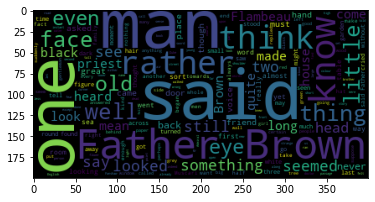

In [295]:
chesterton = ' '.join(chesterton_words)
wc.generate(chesterton)
plt.imshow(wc)